# Support Vector Machine

In [91]:
# Support Vector Machine using libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
dataset = pd.read_csv("league_of_lol.csv")

# insert on a dataframe called pd the following columns: blueKills', 'blueAvgLevel', 'blueWins'
pd = dataset[['blueKills', 'blueAvgLevel', 'blueWins']]

X = pd.iloc[:, :-1].values
y = pd.iloc[:, -1].values

In [93]:
#Dividir el conjunto de datos en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [94]:
# Entrene el modelo de SVM con el conjunto de entrenamiento
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

SVC(kernel='linear')

In [95]:
# Predicción y métricas de evaluación
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.6771255060728745
classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      1002
           1       0.68      0.67      0.67       974

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976



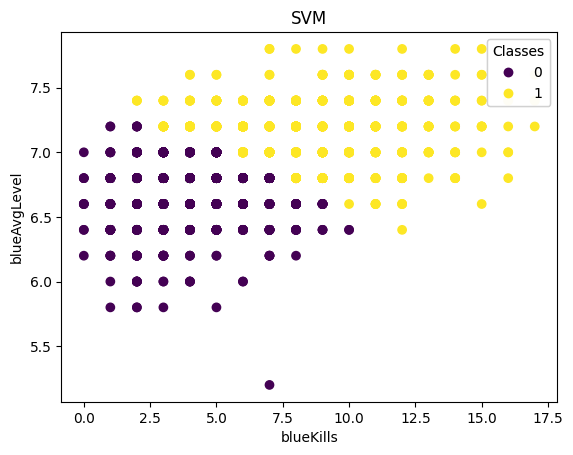

In [96]:
# Previsualización de los resultados del conjunto de prueba
fig, ax = plt.subplots() 
scatter = ax.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

ax.add_artist(legend1)

ax.set_title('SVM')
ax.set_xlabel('blueKills')
ax.set_ylabel('blueAvgLevel')

plt.show()

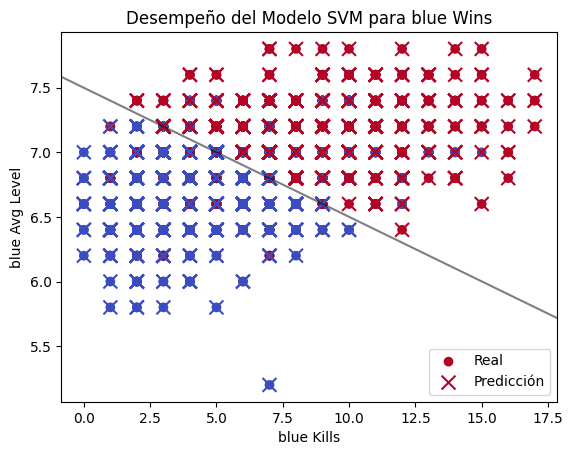

In [97]:
# Scatter plot
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_prueba, cmap='coolwarm', marker='o', label='Real')
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100, label='Predicción')

# Añadir etiquetas y leyenda
plt.xlabel('blue Kills')
plt.ylabel('blue Avg Level')
plt.title('Desempeño del Modelo SVM para blue Wins')

# Crear la línea de límite (boundary)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear puntos para trazar la línea de límite
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Obtener decision_function para cada punto en la malla
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar la línea de límite
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Mostrar la gráfica
plt.legend(loc='lower right')
plt.show()
